# <center> HW2 - Linear Discriminant Analysis, Perception Classification <center>

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
#maybe make dataframe and get data description.

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 4,
    centers=4, cluster_std = 2, random_state=100, return_centers=True)

As we can see above, each array represents one of our blobs and each column represents a feature and its center

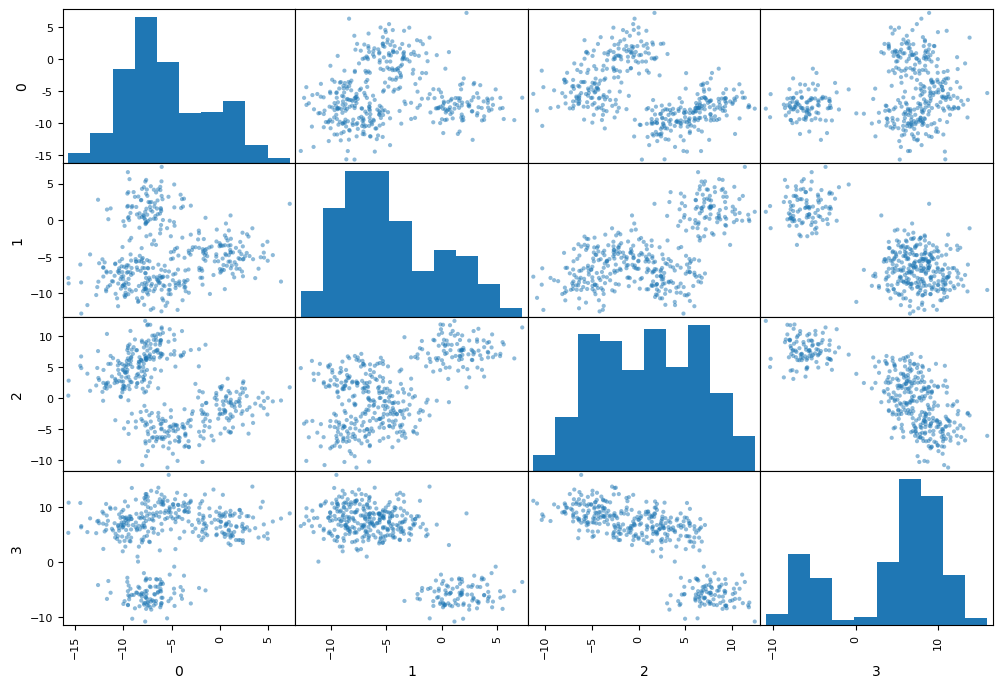

In [3]:

DF = pd.DataFrame.from_records(X)

from pandas.plotting import scatter_matrix


scatter_matrix(DF, figsize=(12,8))
plt.show()


While we can get a general understanding for the entire dataset from the above scatter matrix, it will be much more useful to visualize data as we get further in the process of LDA. At that point, we can get a general understanding for the entire dataset from reduced dimensions and from a much better perspective. It is important to note that although the above scatter matrix does distinguish based on plotting in the 2-dimensions (i.e using 2 columns, like column 1: column 3 in the positions (1,3) and (3, 1)), there are still 400 points, 100 from each class, within each plot. Primarily, dimensional reduction is necessary to make this problem simpler. 

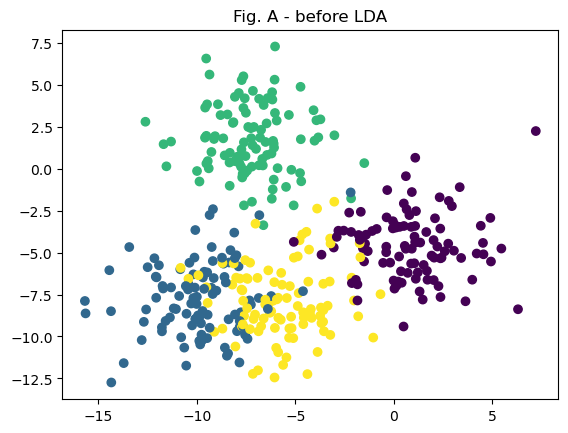

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.title("Fig. A - before LDA")
plt.show()

# len(X[:, 0]) + len(X[:,1])

Though the above graphic does not represent the 4-dimensions that our data is in, it does effectively show that our 4 clusters are centered in their own position and gives us the opportunity to project points into a new 2-dimensional space using knowledge of the within class and between class scatter metrics (matrix) in order to make points of the same class closer together and those of different classes further apart in order to employ our decision-making criterion. It would be impossible to classify the points with high accuracy without performing dimensional reduction techniques of LDA.

a. [20 pts] Modify the within-class (Sw) and between-class (SB) functions in the lecture
 note to calculate the scatter matrices.

In [5]:
import numpy as np

mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis = 0))  # get the maen vectors for each class
    Overall_Mean = np.mean(X, axis = 0)  # get the weighted mean...


mean_vectors

for i, lab in zip(range(0,4), ['Class 1: ', 'Class 2: ', 'Class 3: ', 'Class 4: ']):
    print(lab + str(mean_vectors[i]))

Overall_Mean

Class 1: [ 0.82744825 -4.59819208 -1.45809237  6.99189147]
Class 2: [-9.87038197 -7.71058888  3.46678297  6.29065458]
Class 3: [-7.22645471  1.66250747  7.72800594 -5.9162825 ]
Class 4: [-5.69657185 -7.85882945 -5.54778158  9.74113663]


array([-5.49149007, -4.62627573,  1.04722874,  4.27685005])

Above we calculated the mean vectors for each of the 4 blobs (clusters). We can now find the mean separation vector by adding the mean vectors for each feature.

In [6]:
#change mean_sep to "weighed mean" calculation when calculating SB.
# we dont / cant use mean separation calculations for multiclassification


mean_sep = [] # my values have more precision if this ever becomes an issue (it never will)
for i in range(0,4):
    mean_sep.append((mean_vectors[0][i]+mean_vectors[1][i]+mean_vectors[2][i]+mean_vectors[3][i])/4)

print("Mean separation b/w all vectors: " + str(mean_sep))

Mean separation b/w all vectors: [-5.491490070270536, -4.626275734695496, 1.0472287394602937, 4.276850046357971]


In [7]:
SW = np.zeros((4,4))
for cl, mv in zip(range(0,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1) 
        class_sc_mat += (x_-mv).dot((x_-mv).T) # calculate Sw
    SW += class_sc_mat


print("Within-class scatter matrix:")
for i in range(0, 4):
    print(SW[i])

Within-class scatter matrix:
[1750.98152406  106.48932315  198.55647822 -169.76805166]
[ 106.48932315 1723.81488361   41.4319164   133.18995014]
[ 198.55647822   41.4319164  1636.0479396  -122.4631805 ]
[-169.76805166  133.18995014 -122.4631805  1638.32393169]


Above, we can see that Sw is a symmetric 4x4 matrix.

In [8]:
SB = np.zeros((4,4))
for cl, mean_vec in enumerate(mean_vectors):
    n = X[y==cl, :].shape[0] #number of columns in blob
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_Mean.reshape(4,1)  #overall mean -> weighted mean...
    SB += n*(mean_vec-overall_mean).dot((mean_vec - overall_mean).T)  #calculate SB using 

print("Between-class scatter matrix:")
for i in range(0, 4):
    print(SB[i])

Between-class scatter matrix:
[ 6215.58365775   343.5454076  -3666.43317823  2490.20459148]
[  343.5454076   5951.19739909  5579.96630527 -8790.09561851]
[ -3666.43317823   5579.96630527  10025.78216681 -10606.46152794]
[  2490.20459148  -8790.09561851 -10606.46152794  14518.52376827]


We have also identified SB as a symmetric matrix, of very high (maximal) values as expected.

 b. [5 pts] Reduce the dimensions to 2-D by finding the eigenvalues, λ, and their corresponding
 eigenvectors using SB and Sw matrices found in a). Projectile points and visualize the result.

In [9]:
# find eigenvalues, eigenvectors
Sw_inv_SB = np.linalg.inv(SW).dot(SB)
eigenvalues, eigenvectors = np.linalg.eig(Sw_inv_SB) 
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]

for i in eigen_pairs:
    print("Eigenvalue: " + str(i[0]) +"\n", "Corresponding eigenvector: " + str(i[1]) + "\n")

# given the eigenvalues, eigenvectors, we need to reduce to 2-dimensions using 2 eigenvectors. 

Eigenvalue: 18.329565866100403
 Corresponding eigenvector: [-0.31698395  0.41568254  0.50429659 -0.6873239 ]

Eigenvalue: 4.015495496672319
 Corresponding eigenvector: [ 0.80880986  0.42457667 -0.32741828 -0.24157511]

Eigenvalue: 0.7489231082280354
 Corresponding eigenvector: [-0.42438995  0.24315086 -0.78687792 -0.37628973]

Eigenvalue: 3.935718606899028e-16
 Corresponding eigenvector: [-0.2104599   0.77266688  0.11483868  0.5877964 ]



In [10]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  79.37%
Eigenvalue 2:  17.39%
Eigenvalue 3:  3.24%
Eigenvalue 4:  0.00%


Note that our smallest value in the list of eigenvalues is very very small, and to the order of 10^(-16). We will choose our highest value eigenvalues (18.3296, 4.0155) to reduce the data from 4-dimensions for 2-D visualization, as the highest eigenvalue/vectors can ensure that the points (centers) of our blobs are as seperated as possible.

We will use the above weight vectors that correspond with our highest eigenvalues, 18.329565866100403, with [-0.31698395, 0.41568254, 0.50429659,-0.6873239], and 4.015495496672319 with [0.80880986, 0.42457667, -0.32741828, -0.24157511]. We will want to make this vector into a unit vector as well for classification purposes.

In [11]:
# using 2 eigenvalues...?

W = np.array([eigenvectors.T[0], eigenvectors.T[1]]) # r = 2, c = 4
W = W.T #r = 4, c = 2 (column eigenvectors to match the 4 features of our (size 400) data)
W

array([[-0.31698395,  0.80880986],
       [ 0.41568254,  0.42457667],
       [ 0.50429659, -0.32741828],
       [-0.6873239 , -0.24157511]])

In [12]:
def unit_vector(w):
    w_len = np.linalg.norm(w)
    return w/w_len  
# print(W)
W=unit_vector(W)
W

array([[-0.2241415 ,  0.57191493],
       [ 0.29393194,  0.30022105],
       [ 0.35659154, -0.23151968],
       [-0.48601139, -0.1708194 ]])

Given these eigenvalues and eigenvectors, we will make a matrix composed of the eigenvector columns found for the highest value eigenvalues. Consequently, the matrix of eigenvectors represents the weights (or correspondance) between features and clusters (class). 

Note below that X_p holds the projected data on the weight vectors we obtained through the k-2 dimensional reduction in choosing the two highest eigenvalues.

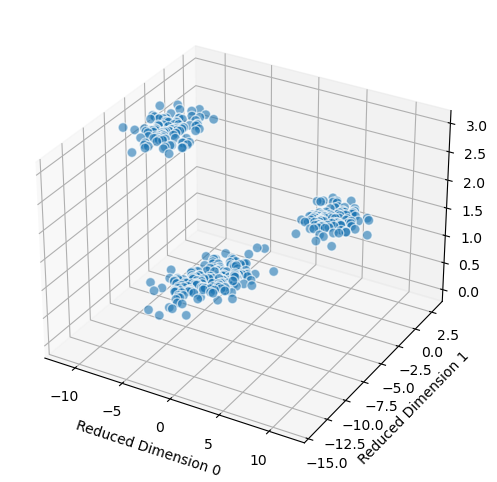

In [13]:
X_p = X.dot(W)  # matrix multiplication of data against observed weights ~ LDA
# X_p

DF_p = pd.DataFrame.from_records(X_p) # store data from the K-2 reduced dimension

"""
Very nice 3-D graphical implementation found from :
https://www.kaggle.com/code/shiyugong/what-s-cooking-eda-and-multi-class-classification
"""

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = DF_p[0]
ys = DF_p[1]
zs = y
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Reduced Dimension 0')
ax.set_ylabel('Reduced Dimension 1')
ax.set_zlabel('y')
plt.show()

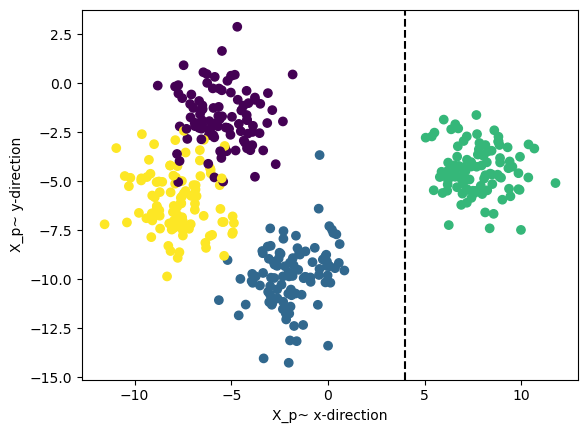

In [14]:
plt.scatter(X_p[:, 0], X_p[:, 1], marker="o", c=y)
plt.xlabel("X_p~ x-direction")
plt.ylabel("X_p~ y-direction")
plt.axvline(x=4, color='black', linestyle='--')
plt.show()

The scatter plots of our untouched data in Fig. A has defined classes, but with high variance / overlap and less pronounced (separation beween) centroids, we can't effectively classify. Seeing in Fig. B, we see that the cluster of green points has effectively been projected into its own region of the graph, completely distinct from the rest of the clusters. We could effectively classify the points in the green group as those greater than x=4 in the projeced data's X [or 0] direction.

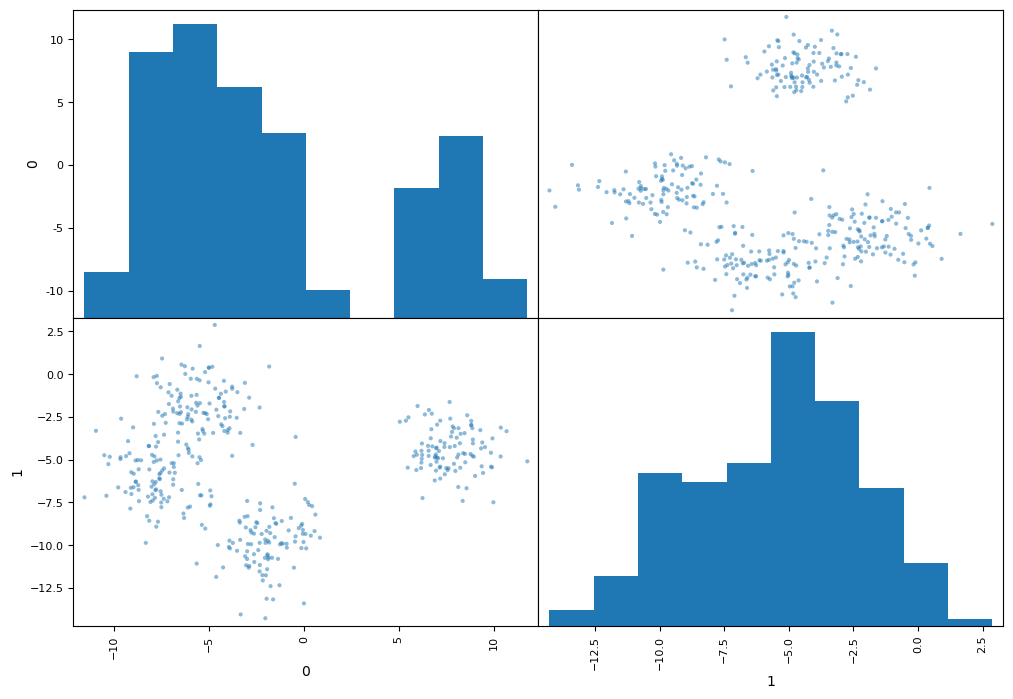

In [15]:
scatter_matrix(DF_p, figsize=(12,8))
plt.show()

# DF_p.describe()

Upon examining the above scatter matrix, we can see that we could also perform classification criterion on the blue group as well, as there does exist a line that would seperate this blue group from the other 3 upon close examination. It may be better to wait until we implement a new LDA model which should further define our groups to classify the blue groups.

 c. [10 pts] Within the reduced space, perform LDA with the provided implementation code to
 classify the target. Report the accuracy.

As suggested by the Professor, we now have a 2-dimensional problem but (should) still have 4 distinct classes. We can see this in the above scatter plot. We should find new weight vectors, but this time for the 2-D problem (400 points but 2 columns), in order to employ multi-classification. It can already be clear that in the projected data (X_p or DF_p) that we have successfully separated out the centroids, and made dots more compacted. Notably, we haven't lost any of our data but have transformed it for easier classification.

In [16]:
### mean vectors ####
### each class mean vector ###
# X=X_p # modified for implementation
mu0 = np.array([np.mean(X_p[y==0][:, 0]),np.mean(X_p[y==0][:, 1])]) ##y=0
mu1 = np.array([np.mean(X_p[y==1][:, 0]),np.mean(X_p[y==1][:, 1])]) ##y=1
print(f'mu0: {mu0}')
print(f'mu1: {mu1}')
### the mean seperator vector ###
mu_ = mu1 - mu0
#mu_ = mu_/np.linalg.norm(mu_)**2 ## unit vector of mu_
print(f'the mean separator is {mu_}')

mu0: [-5.45510334 -1.76401765]
mu1: [-1.87513045 -9.83709425]
the mean separator is [ 3.5799729 -8.0730766]


In [17]:
### With-in class covariance matrix calculation ###
### for each class ###
Sw0 = np.matmul((X_p[y==0]-mu0).T,(X_p[y==0]-mu0))
Sw1 = np.matmul((X_p[y==1]-mu1).T,(X_p[y==1]-mu1))
### Over-all ###
Sw=Sw0+Sw1
print(f'the within-class covariance is \n {Sw}\n')
### Inverse of Over-all ###
Sw_inv = np.linalg.inv(Sw)
print(f'the inverse within-class covariance is \n {Sw_inv}')

the within-class covariance is 
 [[386.34966166  42.90508578]
 [ 42.90508578 464.59192982]]

the inverse within-class covariance is 
 [[ 0.00261515 -0.00024151]
 [-0.00024151  0.00217473]]


In [18]:
### Prediction ###
n = len(X[:,0])
w=np.matmul(Sw_inv,mu_)
w

array([ 0.01131188, -0.01842136])

In [19]:
w=unit_vector(w)

In [20]:
Sb = np.matmul(mu_.reshape(2,1),mu_.reshape(2,1).T)
print("the between class covariance:\n {}".format(Sb))

the between class covariance:
 [[ 12.81620593 -28.90139542]
 [-28.90139542  65.17456583]]


In [21]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
# print(eigenvectors)

lambda_max = eigenvalues[1]   # lambda_max
eigenvector_max = eigenvectors[:,1]   # eigenvector_max
eigenvector_u = unit_vector(eigenvector_max)


for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(2,1)
    print("Eigenvalue {:} : {:.2e}".format(i+1,eigenvalues[i].real))
    print("Eigenvectors {}: \n{}".format(i+1, eigenvectors_sc.real))

eigenvector_u # unit vector eigenvector_max

Eigenvalue 1 : 0.00e+00
Eigenvectors 1: 
[[-0.91415   ]
 [-0.40537609]]
Eigenvalue 2 : 1.89e-01
Eigenvectors 2: 
[[ 0.52328067]
 [-0.8521604 ]]


array([ 0.52328067, -0.8521604 ])

In [22]:
# from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# X_p = X_p*eigenvector_u

lda = LinearDiscriminantAnalysis()
lda.fit(X_p,y)
ylda_hat = lda.predict(X_p)
w_lda = np.array([lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]])
print(f'w_lda: {w_lda}')
wlda_hat = unit_vector(w_lda)
#wlda_hat = np.array([lda.intercept_[0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][1]/np.sum(lda.coef_**2)**0.5])
print(f'unit vector of wlda: {wlda_hat}')
print(f'accuracy: {accuracy_score(y,ylda_hat)}')
print(lda.means_)

w_lda: [-1.92644842 -1.88118952  1.73837193]
unit vector of wlda: [-0.60107626 -0.58695491  0.54239402]
accuracy: 0.9725
[[-5.45510334 -1.76401765]
 [-1.87513045 -9.83709425]
 [ 7.7395347  -4.4123673 ]
 [-7.74571819 -5.996895  ]]


Upon getting the accuracy for our classifications, we can see that our model accurately classified 97.25% of our points. This means that we misclassified, or had a misclassification rate of 2.75% among all of the data points, composing 11 of our data points.

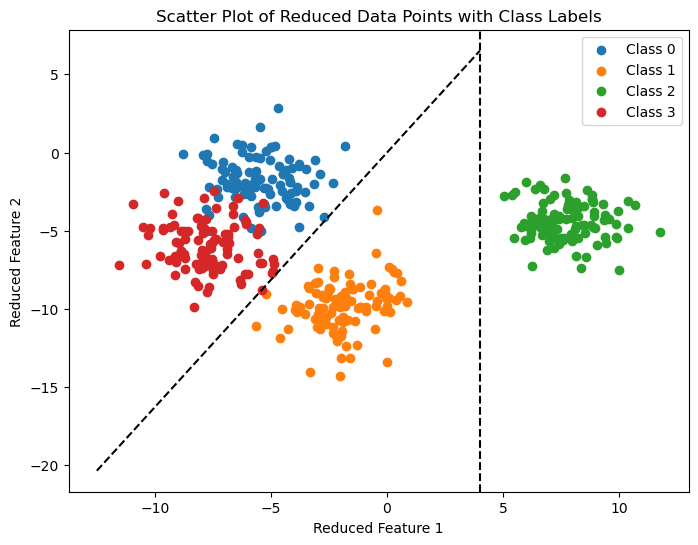

In [37]:
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_p[y == i, 0], X_p[y == i, 1], label=f'Class {i}')

plt.title('Scatter Plot of Reduced Data Points with Class Labels')
plt.axvline(x=4, color='black', linestyle='--')
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
slope = 0.8521604/0.52328067
x_values = np.linspace(-12.5, 4, 100)
y_values = slope * x_values
plt.plot(x_values, y_values, color = 'black', linestyle='--')

# slope = (w_lda[1]/w_lda[2])
# x_values = np.linspace(-10, -4, 100)
# y_values = slope*x_values + w_lda[0]/w_lda[2]
# plt.plot(x_values, y_values, color = 'black', linestyle='--')

plt.legend()
plt.show()

d. [5 pts] Perform scikit-learn LDA to classify the target in the original space by using the
 original data). Compare the results from c).

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()

lda.fit(X,y)
ylda_hat = lda.predict(X)
w_lda = np.array([lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]])
print(f'w_lda: {w_lda}')
wlda_hat = unit_vector(w_lda)
# wlda_hat = np.array([lda.intercept_[0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][0]/np.sum(lda.coef_**2)**0.5, lda.coef_[0][1]/np.sum(lda.coef_**2)**0.5])
print(f'unit vector of wlda: {wlda_hat}')
print(f'accuracy: {accuracy_score(y,ylda_hat)}')
print(lda.means_)

w_lda: [-2.81564299  1.59638612 -0.13448058]
unit vector of wlda: [-0.86915896  0.49278737 -0.04151272]
accuracy: 0.9825
[[ 0.82744825 -4.59819208 -1.45809237  6.99189147]
 [-9.87038197 -7.71058888  3.46678297  6.29065458]
 [-7.22645471  1.66250747  7.72800594 -5.9162825 ]
 [-5.69657185 -7.85882945 -5.54778158  9.74113663]]


In [ ]:
# def h(x):
#     if x > 5: 
#         return 'green'

# for i in range(0,400):
#     print(h(DF_p[0][i]))